In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Inspection.csv')

/Library/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Find top 10 Cuisines
data['CUISINE DESCRIPTION'].value_counts().head(10)

American                                                            82623
Chinese                                                             39798
CafÃ©/Coffee/Tea                                                    18122
Pizza                                                               17131
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16577
Italian                                                             15758
Mexican                                                             15261
Japanese                                                            13670
Caribbean                                                           13471
Spanish                                                             11615
Name: CUISINE DESCRIPTION, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a218fcba8>],
      dtype=object)

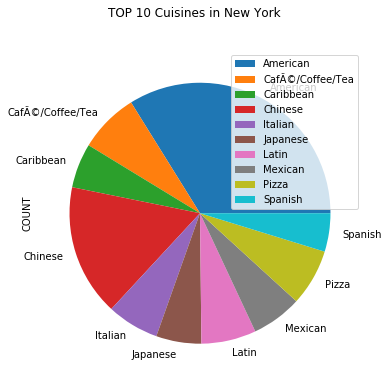

In [4]:
c = data[data['CUISINE DESCRIPTION'].isin(['American','Chinese','CafÃ©/Coffee/Tea','Pizza',
                                            'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
                                            'Italian','Mexican','Japanese','Caribbean','Spanish'])]
c = c.replace('Latin (Cuban, Dominican, Puerto Rican, South & Central American)', 'Latin')
c1 = c.groupby('CUISINE DESCRIPTION').agg({'CUISINE DESCRIPTION':'count'})
c1.columns = ['COUNT']
# c1.append(c1.sum().rename('Total'))
c1.plot.pie(subplots=True, y='COUNT',figsize=(6, 6), title ='TOP 10 Cuisines in New York')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

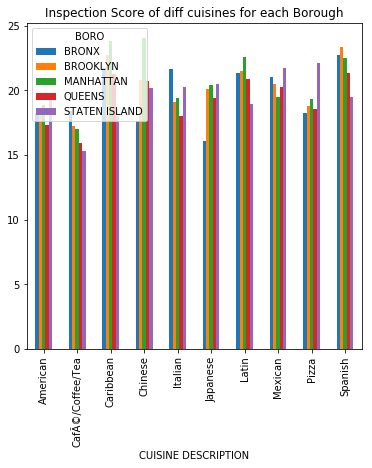

In [5]:
cuisine = data[data.BORO != 'Missing']
cuisine1 = cuisine[cuisine['CUISINE DESCRIPTION'].isin(['American','Chinese','CafÃ©/Coffee/Tea','Pizza',
                                            'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
                                            'Italian','Mexican','Japanese','Caribbean','Spanish'])]
cuisine1 = cuisine1.replace('Latin (Cuban, Dominican, Puerto Rican, South & Central American)', 'Latin')
cuisine2 = cuisine1.groupby(['CUISINE DESCRIPTION','BORO']).agg({'SCORE':'mean'}).round(2).unstack()
cuisine2
cuisine2['SCORE'].plot.bar(title='Inspection Score of diff cuisines for each Borough',figsize=(6,6))
plt.xticks(rotation=90)

## With the inspection, restaurant has higher rate on not critical flag when doing re-inspection compare to initial inspection.
## The result does not support the assumption. 

In [6]:
def get_critical_ratio(restaurant):
    dt1 = data[['CAMIS','DBA','BORO','CRITICAL FLAG','INSPECTION TYPE']]
    restaurant_in = restaurant[restaurant['INSPECTION TYPE'].str.contains("Initial Inspection",na=False)]
    restaurant_in = restaurant_in[restaurant_in['CRITICAL FLAG'] != 'Not Applicable']
    restaurant_in = restaurant_in.groupby(['BORO','CRITICAL FLAG']).agg({'CRITICAL FLAG': 'count'})
    restaurant_in = restaurant_in.groupby(level=0).apply(lambda x: x / x.sum()).round(2)
    restaurant_in.columns = ['INITIAL RATIO']
    restaurant_re = restaurant[restaurant['INSPECTION TYPE'].str.contains("Re-inspection",na=False)]
    restaurant_re = restaurant_re.groupby(['BORO','CRITICAL FLAG']).agg({'CRITICAL FLAG': 'count'})
    restaurant_re = restaurant_re.groupby(level=0).apply(lambda x: x / x.sum()).round(2)
    restaurant_re.columns = ['RE-INSPECTION RATIO']
    restaurant_in['RE-INSPECT RATIO'] = restaurant_re['RE-INSPECTION RATIO']
    return restaurant_in
restaurant = data[data.DBA == "BURGER KING"]
ratio = get_critical_ratio(restaurant)
ratio

INITIAL RATIO  RE-INSPECT RATIO
BORO          CRITICAL FLAG                                 
BRONX         Critical                0.47              0.42
              Not Critical            0.53              0.57
BROOKLYN      Critical                0.44              0.42
              Not Critical            0.56              0.58
MANHATTAN     Critical                0.38              0.38
              Not Critical            0.62              0.62
QUEENS        Critical                0.41              0.50
              Not Critical            0.59              0.48
STATEN ISLAND Critical                0.39              0.56
              Not Critical            0.61              0.44

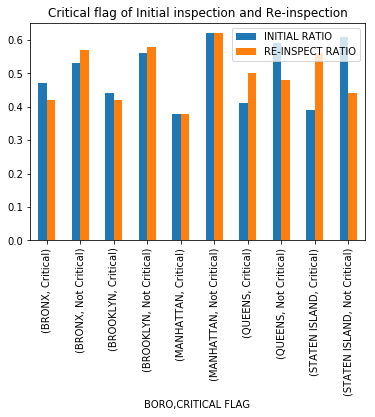

In [7]:
ratio.plot(kind='bar',title='Critical flag of Initial inspection and Re-inspection')

In [8]:
house = pd.read_csv('housing.csv')
house['Project Start Date'] = pd.to_datetime(house['Project Start Date'])
house['Project Start Date'] = pd.DatetimeIndex(house['Project Start Date']).year
house

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,44218,MEC E. 125TH ST. PARCEL B WEST,2018,NaN,987329.0,2319,3 AVENUE,Manhattan,10035.0,1.017900e+09,...,129,15,0,0,0,0,297,0,297,404
1,44256,WSFSSH. 145 WEST 108TH ST. VALLEY LODGE,2018,NaN,988143.0,137-159,WEST 108 STREET,Manhattan,10025.0,1.018630e+09,...,19,8,0,0,0,0,199,0,199,199
2,48038,165 WEST 80TH STREET,2018,NaN,35779.0,165,WEST 80 STREET,Manhattan,10024.0,1.012110e+09,...,0,0,0,0,0,0,29,0,29,29
3,68087,151 SOMERS STREET CONDOMINIUMS,2018,NaN,371705.0,151,SOMERS STREET,Brooklyn,11233.0,3.015400e+09,...,0,0,0,0,0,0,0,2,2,8
4,63168,MANHANTANVILLE (PHASE II),2018,12/27/2018,967819.0,3595,BROADWAY,Manhattan,10031.0,1.020948e+09,...,7,0,0,0,0,0,0,7,7,43
5,64492,3377 WHITE PLAINS ROAD LLC.YR15.FY19,2018,NaN,874245.0,3377,WHITE PLAINS ROAD,Bronx,10467.0,2.046240e+09,...,0,0,0,0,0,0,72,0,72,72
6,66653,CAMBER. 3-11 W118TH ST. VICTORY PLAZA,2018,NaN,985501.0,11,WEST 118 STREET,Manhattan,10026.0,1.017170e+09,...,0,0,0,0,0,0,136,0,136,136
7,66931,2178 BERGEN STREET,2018,NaN,986562.0,2178,BERGEN STREET,Brooklyn,11233.0,3.014560e+09,...,4,0,0,0,0,0,7,0,7,33
8,67577,ESPLANADE GARDENS INCORPORATED.PLP.FY19,2018,NaN,3638.0,2541,ADAM C POWELL BOULEVARD,Manhattan,10039.0,1.020160e+09,...,210,51,0,0,0,0,0,312,312,312
9,67577,ESPLANADE GARDENS INCORPORATED.PLP.FY19,2018,NaN,23412.0,700,ESPLANADE GDNS PLAZA,Manhattan,10039.0,1.017440e+09,...,209,52,0,0,0,0,0,312,312,312


In [15]:
def get_mid_units_ratio(year):
    house1 = year[['Borough','Project Start Date','Extremely Low Income Units', 'Very Low Income Units',
           'Low Income Units', 'Moderate Income Units', 'Middle Income Units','Other Income Units',]]
    house2 = house1.groupby('Borough').agg({'Extremely Low Income Units': 'sum','Very Low Income Units':'sum',
                                                         'Low Income Units':'sum','Moderate Income Units':'sum',
                                                         'Middle Income Units':'sum','Other Income Units':'sum'})
    house2['Total'] = house2.sum(axis=1)
    house3 = house2.div(house2['Total'], axis='index').round(2)
    house4 = house3.reset_index()
    house4['Moderate_Middle_Units'] = house4['Moderate Income Units']+house4['Middle Income Units']
    house5 = house4[['Borough','Moderate_Middle_Units']]
    return house5
year1 = house[house['Project Start Date'] == 2016]
get_mid_units_ratio(year1)

,Borough,Moderate_Middle_Units
0,Bronx,0.09
1,Brooklyn,0.19
2,Manhattan,0.19
3,Queens,0.27
4,Staten Island,0.02


In [16]:
year2 = house[house['Project Start Date'] == 2017]
get_mid_units_ratio(year2)

,Borough,Moderate_Middle_Units
0,Bronx,0.03
1,Brooklyn,0.14
2,Manhattan,0.26
3,Queens,0.15
4,Staten Island,0.16


In [17]:
year3 = house[house['Project Start Date'] == 2018]
get_mid_units_ratio(year3)

,Borough,Moderate_Middle_Units
0,Bronx,0.04
1,Brooklyn,0.08
2,Manhattan,0.08
3,Queens,0.25
4,Staten Island,0.02


In [ ]:
# dt['BORO'].value_counts()
# missing_boro = dt[dt.BORO == 'Missing']
# missing_boro.CAMIS.count()
# dt.groupby(['BORO','CUISINE DESCRIPTION']).count().sort_values(by='CAMIS', ascending=False)
dt['DBA'].value_counts()